<a href="https://colab.research.google.com/github/granantuin/Model_vs_data_station/blob/master/ml_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**download x and y data**

In [0]:
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
y_data=pd.read_excel(dr[0]+"y_coron_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]


**split**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)


****

## Create the model

Next create the model. We will use simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron. 

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[9]` — This specifies that the input to this layer is a single value. That is, the shape is a nine-dimensional array with nine member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing wind degree.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)


In [0]:
l0 = tf.keras.layers.Dense(units=6, input_shape=[9]) 
l1 = tf.keras.layers.Dense(units=1,)
model = tf.keras.Sequential([l0,l1])
model.summary()
  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [0]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(0.1),metrics=["mae"])

**Train model**

In [0]:
history = model.fit(x_train, y_train, validation_split=0.2,epochs=200, verbose=False)
print("Finished training the model")

In [0]:
hist=pd.DataFrame(history.history)


In [0]:
hist

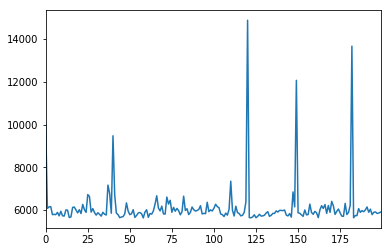

In [0]:
hist["loss"].plot()


In [0]:
hist["val_loss"].plot()

In [0]:
hist["mean_absolute_error"].plot()

**Display training statistics**

## Use the model to predict values



In [0]:
y_pred=model.predict(x_test)

In [0]:
y_pred=y_pred.reshape(1,-1)[0]

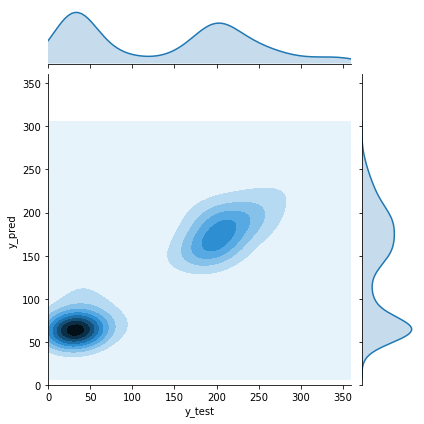

In [0]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,xlim=(0,360),ylim=(0,360), )

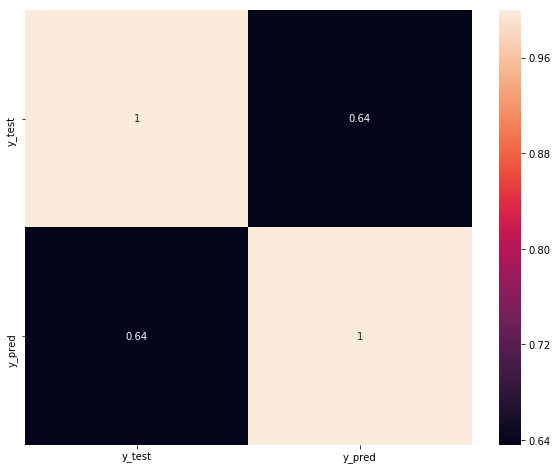

In [0]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(),annot=True)

In [0]:

df2['DIF']=y_pred-y_test
df2["DIF"]=df2["DIF"][df2["DIF"]<180]
df2["DIF"]=df2["DIF"][df2["DIF"]>-180]
  

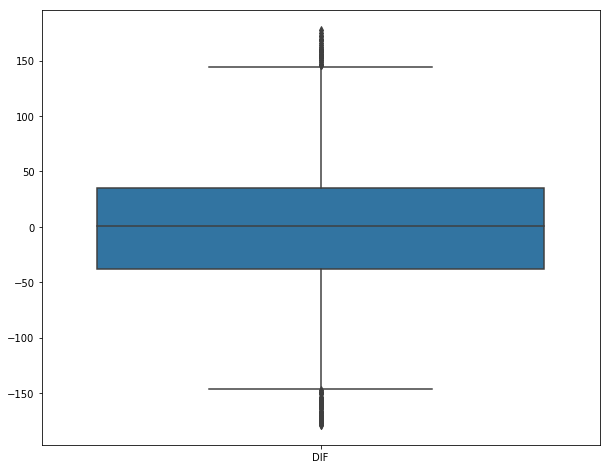

In [0]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df2.iloc[:,2:3])
  

In [0]:
df2.iloc[:,2:3].plot(kind="kde",grid=True,xlim=(-360,360),figsize=(10, 8))

In [0]:
df2.iloc[:,2:3].describe()

,DIF
count,2463.000000
mean,-2.241905
std,59.034629
min,-178.751144
25%,-37.664490
50%,0.902374
75%,35.258881
max,177.792526


**Filtering dat wind only more 2 meters per second**

In [0]:
y_data=pd.read_excel(dr[0]+"y_coron_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]
y_spd=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0) 
y_spd=y_spd[y_spd>0]/3.6# units=Km/h to m/s
y_spd=y_spd[y_spd>2]#threshold 2m/s
y_spd=y_spd.rename(index=str, columns={"value": "spd"})
res1= x_data.join(y_spd, how='outer').dropna()
res2=res1.join(y_data, how='outer').dropna()
x_data=res2.iloc[:,0:9]
y_data=res2["value"]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)

In [0]:
model.fit(x_train, y_train, validation_split=0.2,epochs=200, verbose=False)

In [0]:
y_pred=model.predict(x_test)
y_pred=y_pred.reshape(1,-1)[0]


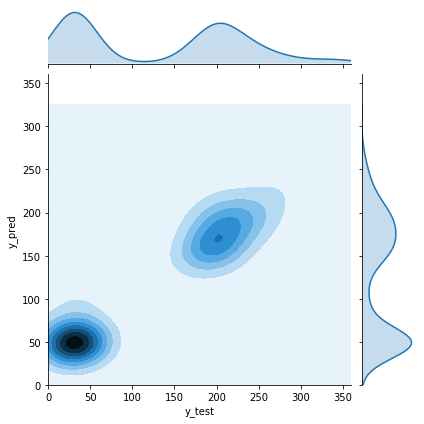

In [0]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,xlim=(0,360),ylim=(0,360), )

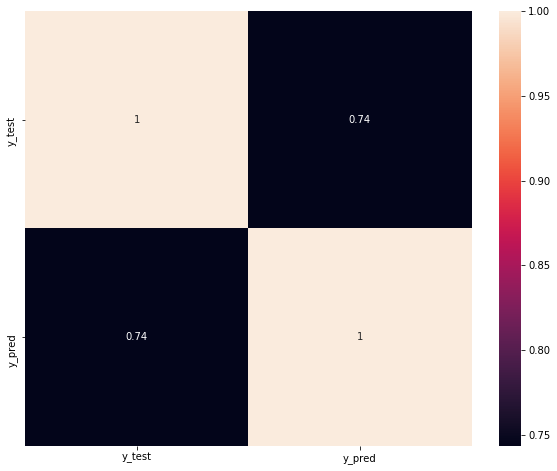

In [0]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2['DIF']=y_pred-y_test
df2["DIF"]=df2["DIF"][df2["DIF"]<180]
df2["DIF"]=df2["DIF"][df2["DIF"]>-180]

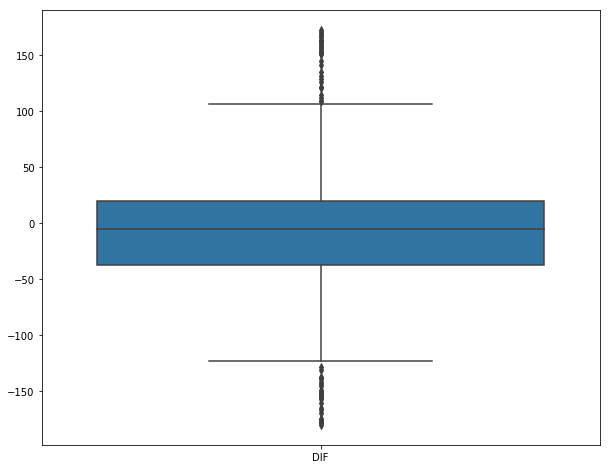

In [0]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df2.iloc[:,2:3])

In [0]:
df2.iloc[:,2:3].describe()

,DIF
count,1858.000000
mean,-7.717987
std,46.329162
min,-179.962357
25%,-37.519402
50%,-5.261055
75%,20.183795
max,172.788177
